<a href="https://colab.research.google.com/github/sharmavaibhav20/FRAUD_DETECTION/blob/main/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Loading Dataset
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
#Checking Dataset
credit_card_data.head()
credit_card_data.tail()
credit_card_data.info()
credit_card_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data['Class'].value_counts()

0.0    11906
1.0       52
Name: Class, dtype: int64

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

(11906, 31)
(52, 31)


In [ ]:
legit.Amount.describe()
fraud.Amount.describe()
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,...,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


In [ ]:
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()
new_dataset.tail()
new_dataset['Class'].value_counts()
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7935.006098,-0.247551,0.254055,0.973927,0.208643,-0.133808,0.093687,-0.060725,0.030457,1.003912,...,0.050044,-0.086213,-0.102436,-0.027549,0.032841,0.110423,0.087504,0.005334,-0.002910,63.723801
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

print(X)
print(Y)

        Time         V1        V2         V3         V4        V5        V6  \
9067   12685   0.928917 -0.617959   2.072673   1.970939 -1.593226  0.686793   
10871  18620   1.127882  0.466285   0.964348   2.558326  0.006212  0.504593   
3572    3052  -0.712030  1.598319   1.406737   1.809357  0.718766 -0.638092   
1285     994  -0.998151  0.183782   2.121871  -0.350077 -0.057158 -0.941431   
2549    2103  -0.423939  0.712750   1.222087  -2.012547  0.248605 -1.208304   
...      ...        ...       ...        ...        ...       ...       ...   
10897  18690 -15.398845  7.472324 -19.026912  11.165526 -6.893856 -2.120937   
11343  19762 -14.179165  7.421370 -21.405836  11.927512 -7.974281 -2.202710   
11710  20011 -14.724627  7.875157 -21.872317  11.906170 -8.348734 -2.262846   
11841  20332 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307   
11880  20451 -15.819179  8.775997 -22.804686  11.864868 -9.092361 -2.386893   

              V7        V8        V9  ...       V20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(544, 30) (435, 30) (109, 30)


In [ ]:
model = LogisticRegression()

# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data: ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data: ', test_data_accuracy)

Accuracy on Training data:  0.9908045977011494
Accuracy score on Test Data:  0.9724770642201835


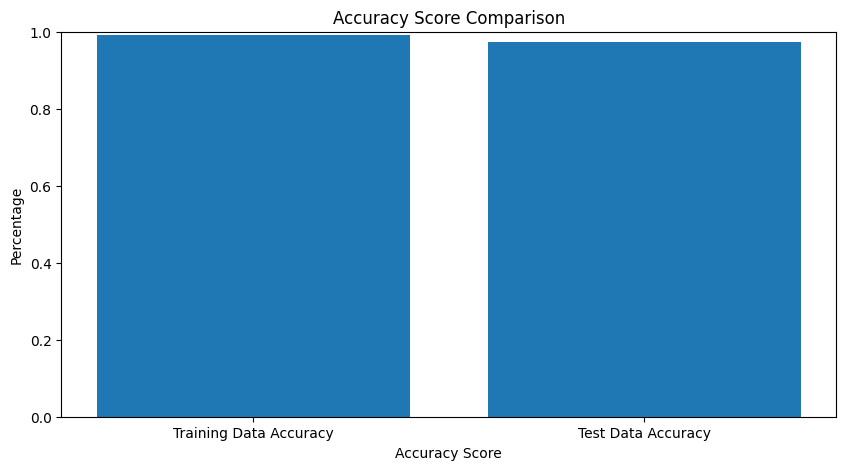

In [ ]:
#Visualizing the model's accuracy
accuracy_scores = {'Training Data Accuracy': training_data_accuracy, 'Test Data Accuracy': test_data_accuracy}

fig = plt.figure(figsize=(10, 5))

plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylim([0, 1])
plt.title('Accuracy Score Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Percentage')
plt.show()